In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
def load_dataset(name):
    path = os.path.join("..", "datasets", name)
    data = pd.read_csv(path)
    data = data.values
    xs = data[:, :-1].astype('float32')
    ys = data[:, -1]
    return xs, ys

In [3]:
blobs_x, blobs_y = load_dataset("blobs2.csv")

In [4]:
blobs_y[blobs_y == 0] = -1

In [5]:
blobs_train_x, blobs_val_x, blobs_train_y, blobs_val_y = train_test_split(
    blobs_x, blobs_y, test_size=0.2)

In [6]:
def get_prediction(w, xs):
    return ((xs @ w) > 0).astype(int) * 2 - 1

def get_accuracy(w, xs, ys):
    return np.mean((get_prediction(w, xs) == ys))

def pocket_algorithm(train_xs, train_ys, val_xs, val_ys, num_epochs=10 ** 6):
    best_w = None
    best_acc = -1
    
    w = np.random.uniform(size=train_xs.shape[1])
    for epoch in range(num_epochs):
        bad_indexes = (get_prediction(w, train_xs) != train_ys)
        if len(bad_indexes) == 0:
            break
            
        i = np.random.choice(np.arange(train_xs.shape[0])[bad_indexes])
        w += train_xs[i] * train_ys[i]
                
        acc = get_accuracy(w, val_xs, val_ys)
        if best_acc < acc:
            best_acc = acc
            best_w = np.copy(w)
            
    return w

In [7]:
def draw(w, xs, ys, deg, name):    
    plt.cla()
    
    delta = 0.025
    xx = np.arange(np.min(xs[:, 1]) - 0.5, np.max(xs[:, 1]) + 0.5, delta)
    yy = np.arange(np.min(xs[:, 2]) - 0.5, np.max(xs[:, 2]) + 0.5, delta)
    xx, yy = np.meshgrid(xx, yy)
    
    ps = PolynomialFeatures(degree=deg).fit_transform(np.c_[xx.ravel(), yy.ravel()])
    z = get_prediction(w, ps).reshape(xx.shape)
    plt.contour(xx, yy, z, [0])
    
    xs_1 = xs[ys == 1]
    xs_2 = xs[ys == -1]
    plt.plot(xs_1[:, 1], xs_1[:, 2], 'ro', c='b')
    plt.plot(xs_2[:, 1], xs_2[:, 2], 'ro', c='r')
    
    plt.title("degree = {}, accuracy on {} = {:.4f}".format(deg, name, get_accuracy(w, xs, ys)))
    plt.show()
    
def find_perceptron_by_deg(train_xs, train_ys, val_xs, val_ys, deg=1):
    train_xs = PolynomialFeatures(degree=deg).fit_transform(train_xs)
    val_xs = PolynomialFeatures(degree=deg).fit_transform(val_xs)
    
    w = pocket_algorithm(train_xs, train_ys, val_xs, val_ys)
    
    draw(w, train_xs, train_ys, deg, "train")
    draw(w, val_xs, val_ys, deg, "validation")

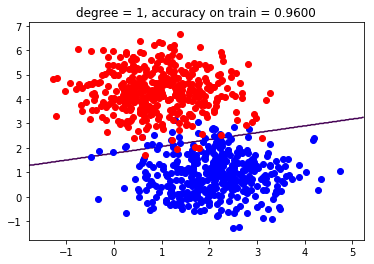

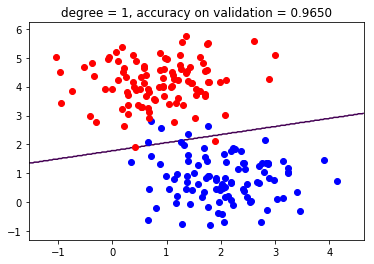

In [8]:
find_perceptron_by_deg(blobs_train_x, blobs_train_y, blobs_val_x, blobs_val_y, deg=1)

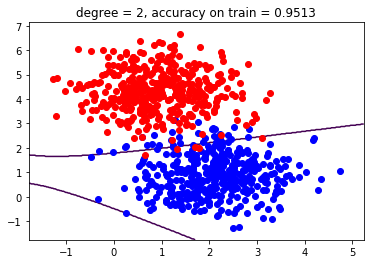

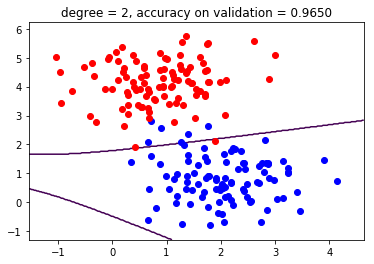

In [9]:
find_perceptron_by_deg(blobs_train_x, blobs_train_y, blobs_val_x, blobs_val_y, deg=2)

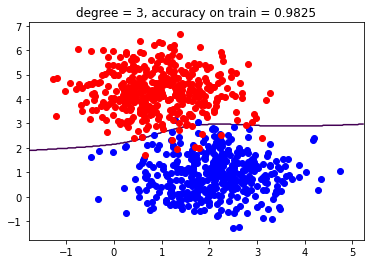

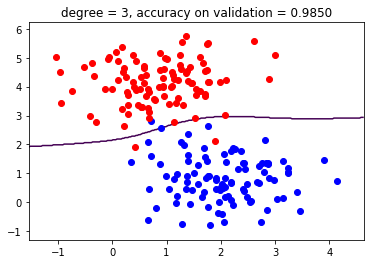

In [10]:
find_perceptron_by_deg(blobs_train_x, blobs_train_y, blobs_val_x, blobs_val_y, deg=3)

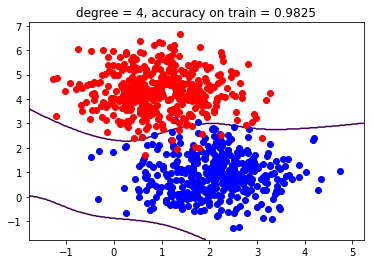

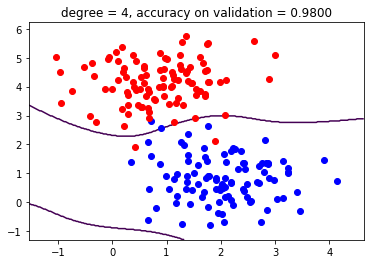

In [11]:
find_perceptron_by_deg(blobs_train_x, blobs_train_y, blobs_val_x, blobs_val_y, deg=4)